<a href="https://colab.research.google.com/github/skyjadel/Prediction-of-quality-of-Wine/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
df = pd.read_csv(url)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


根據這份資料的kaggle原始網頁，這份資料有這些欄位<br>
輸入欄位<br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
然後有最後一個我們需要預測的欄位<br>
12 - quality (score between 0 and 10)


## 檢查空缺值

In [36]:
nan_num = np.sum(np.array(df.isna()))
print(f'原始資料有 {nan_num} 個空缺值')

原始資料有 0 個空缺值


## 資料分布

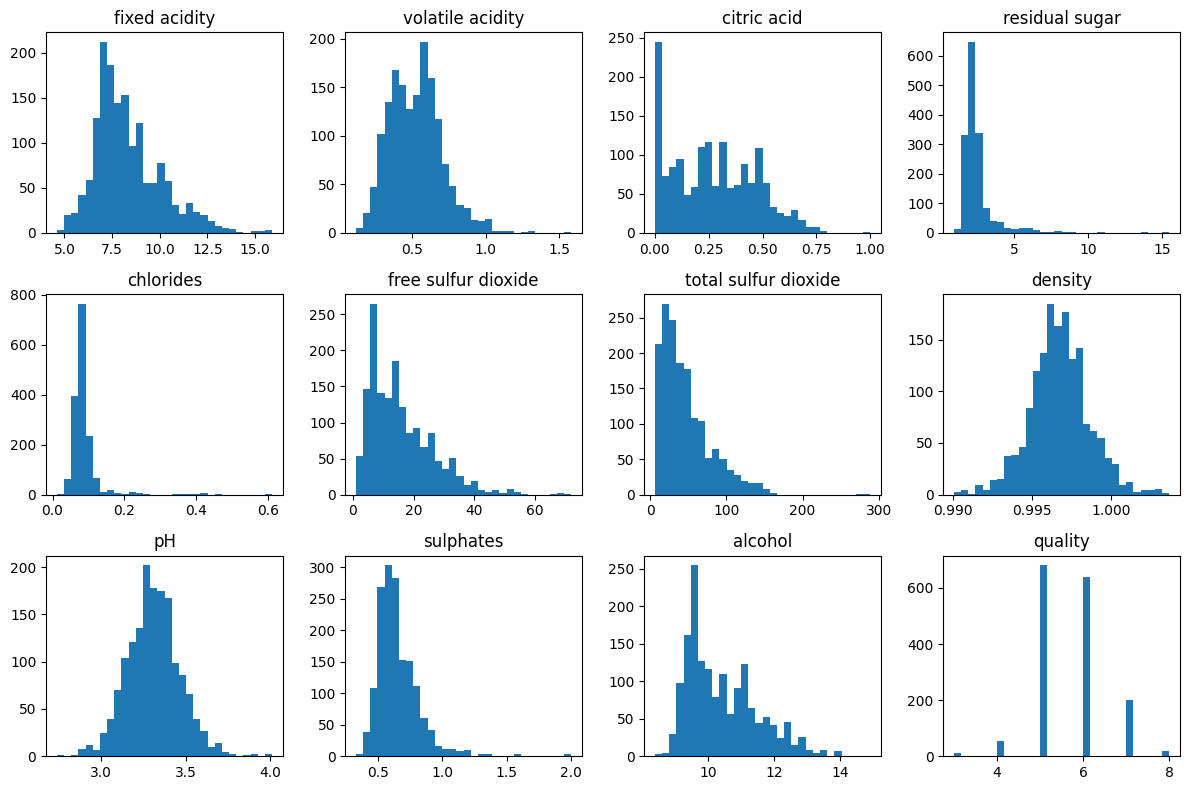

In [37]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches(12,8)
for i, col in enumerate(df.columns):
  this_data = df[col]
  axes[int(i/4)][i%4].hist(df[col], 30)
  axes[int(i/4)][i%4].set_title(col)
fig.tight_layout()

輸入欄位大致可以分成以下幾種類型
1. 大致對稱的常態分布：density, pH
2. 大致對稱的常態分布加上少數數值較大的 outliers：volatile acidity, chlorides,  sulphates
3. 右偏分布：fixed acidity, residual sugar, alcohol
4. 接近 gamma distribution 的分布：citric acid, free sulfur dioxide, total sulfur dioxide

In [38]:
q = df['quality']
unique_q = sorted(list(set(q)))
q_dict = {i:0 for i in unique_q}

for j in q:
  q_dict[j] += 1

In [39]:
bar_y = [v / len(df) for v in q_dict.values()]
bar_x = q_dict.keys()

Text(0, 0.5, 'Propotion')

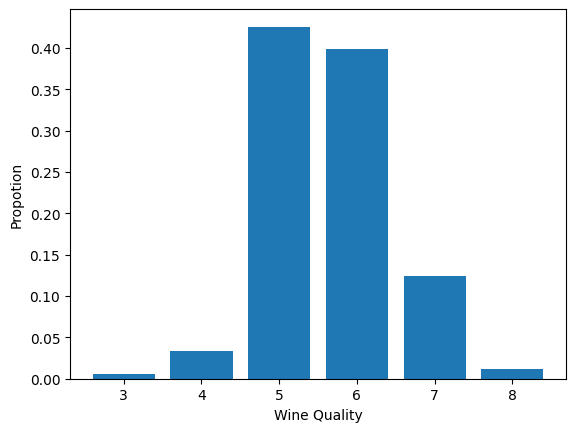

In [40]:
fig, ax = plt.subplots()
ax.bar(bar_x, bar_y)
ax.set_xlabel('Wine Quality')
ax.set_ylabel('Propotion')

In [41]:
for k, v in q_dict.items():
  print(f'{v*100/len(df):.2f}% of all samples are labeled as {k}')
print(f'Avg of wine quality score: {np.mean(q):.2f}')
print(f'Std of wine quality score: {np.std(q):.2f}')

0.63% of all samples are labeled as 3
3.31% of all samples are labeled as 4
42.59% of all samples are labeled as 5
39.90% of all samples are labeled as 6
12.45% of all samples are labeled as 7
1.13% of all samples are labeled as 8
Avg of wine quality score: 5.64
Std of wine quality score: 0.81


可以看出，有約82%的樣本被標記成品質分數為5或6，另外有12%的樣本被標記為7分，剩餘的樣本分數有3, 4, 8分<br>
平均品質分數為5.64分，標準差則是0.81分

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

前面有檢查過原始資料中沒有缺失值，所以在只需要baseline的前提下，可以直接把原始資料分成訓練集與測試集。

In [43]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1923)

In [44]:
X = df_train.drop('quality', axis = 1)
y = df_train['quality']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X, y = y, cv = 5)
print(rfc_eval)
print(f'Avg acc is {np.mean(rfc_eval):.4f}')

[0.65625    0.71875    0.69921875 0.6484375  0.65490196]
Avg acc is 0.6755


## 進一步看看分布

In [45]:
from scipy.stats import pearsonr

In [46]:
correlation_matrix = pd.DataFrame({col:[0,]*len(df_train.columns) for col in df_train.columns})
correlation_matrix.insert(loc=0, column='col', value=df_train.columns)
correlation_matrix.set_index('col', inplace=True)
for i, col1 in enumerate(df_train.columns):
  for j, col2 in enumerate(df_train.columns):
    x = np.array(df[col1])
    y = np.array(df[col2])
    correlation_matrix.loc[col2,col1] = pearsonr(x,y).statistic

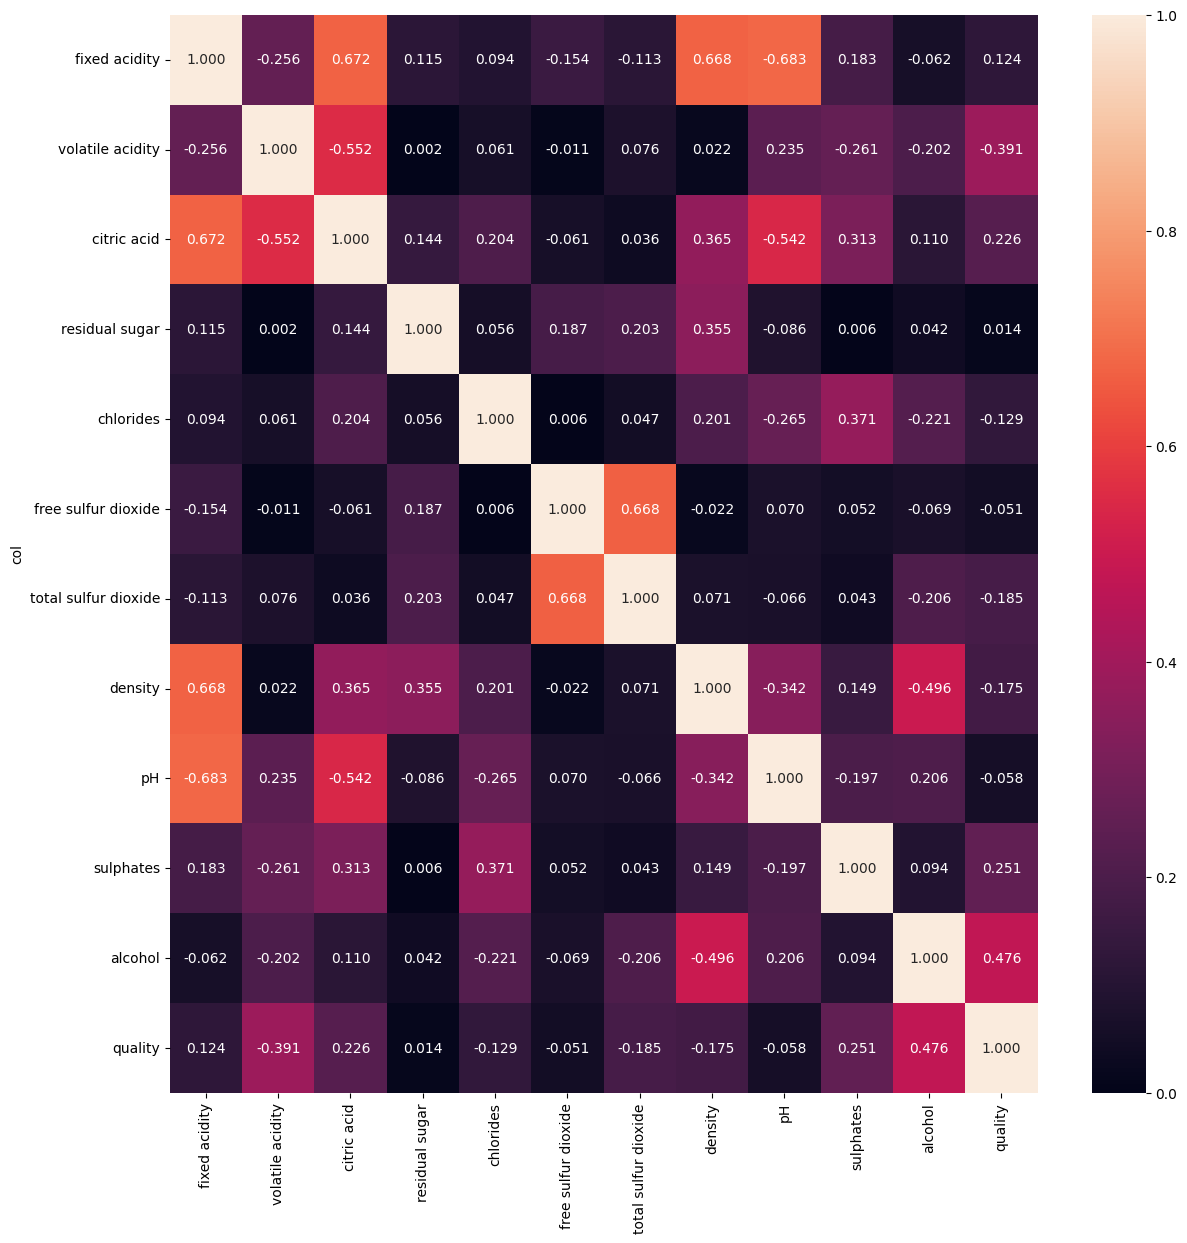

In [47]:
import seaborn as sns
fig, ax = plt.subplots()
sns.heatmap(np.abs(correlation_matrix), annot=correlation_matrix, fmt=".3f", ax=ax, vmin=0, vmax=1)
fig.set_size_inches(14,14)

In [48]:
df_train[0:20]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
276,6.9,0.540,0.04,3.0,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
479,9.4,0.685,0.11,2.7,0.077,6.0,31.0,0.99840,3.19,0.70,10.1,6
78,6.7,0.750,0.12,2.0,0.086,12.0,80.0,0.99580,3.38,0.52,10.1,5
1490,7.1,0.220,0.49,1.8,0.039,8.0,18.0,0.99344,3.39,0.56,12.4,6
581,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6,5
395,12.0,0.370,0.76,4.2,0.066,7.0,38.0,1.00040,3.22,0.60,13.0,7
798,9.4,0.500,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7,6
697,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6
1060,11.6,0.230,0.57,1.8,0.074,3.0,8.0,0.99810,3.14,0.70,9.9,6
1249,7.1,0.600,0.01,2.3,0.079,24.0,37.0,0.99514,3.40,0.61,10.9,6


In [49]:
pearsonr(df_train['quality'], df_train['volatile acidity']/(df_train['volatile acidity']+ df_train['citric acid'] + df_train['fixed acidity'])).statistic

-0.33564828975225086

In [50]:
from tqdm import tqdm

12it [00:00, 16.06it/s]


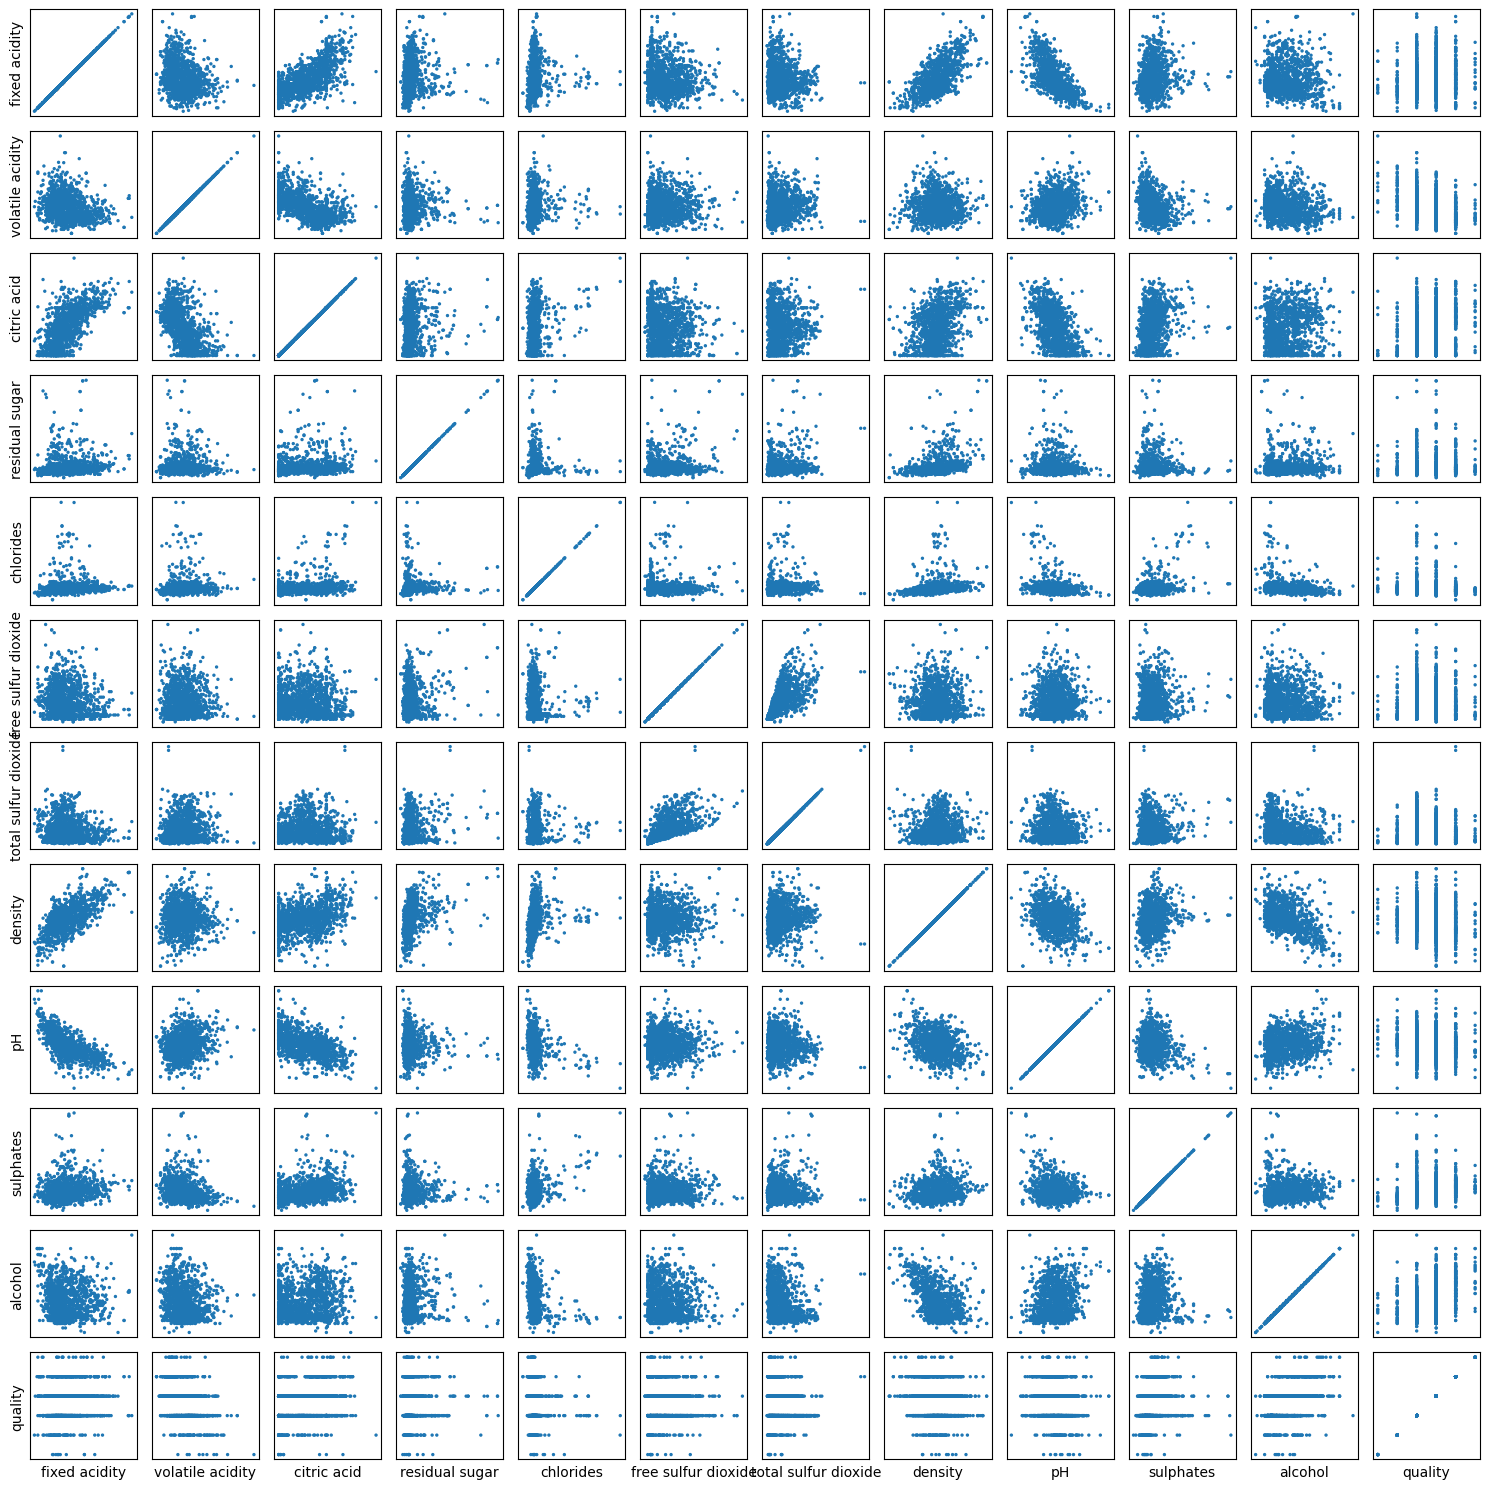

In [51]:
fig, axes = plt.subplots(12, 12)
fig.set_size_inches(15, 15)
for i, col1 in tqdm(enumerate(df_train.columns)):
  for j, col2 in enumerate(df_train.columns):
    x = np.array(df[col1])
    y = np.array(df[col2])
    axes[i, j].scatter(y, x, x*0+2)
    axes[i, j].set_xticks([])
    axes[i, j].set_yticks([])
    if j == 0:
      axes[i, j].set_ylabel(col1)
    if i == len(df_train.columns) - 1:
      axes[i, j].set_xlabel(col2)
    #axes[i, j].set_xlabel(col1)
fig.tight_layout()

## 平衡分布

### 除去 3 sigma 以外的資料

In [52]:
remove_idx = np.zeros(len(df_train))
for i, col in enumerate(df_train.columns[0:-1]):
  this_x = np.array(df_train[col])
  dev = np.abs((this_x - np.mean(this_x)) / np.std(this_x))
  remove_idx[np.where(dev > 3)] = 1

In [53]:
df_train1 = df_train.iloc[np.where(remove_idx==0)]

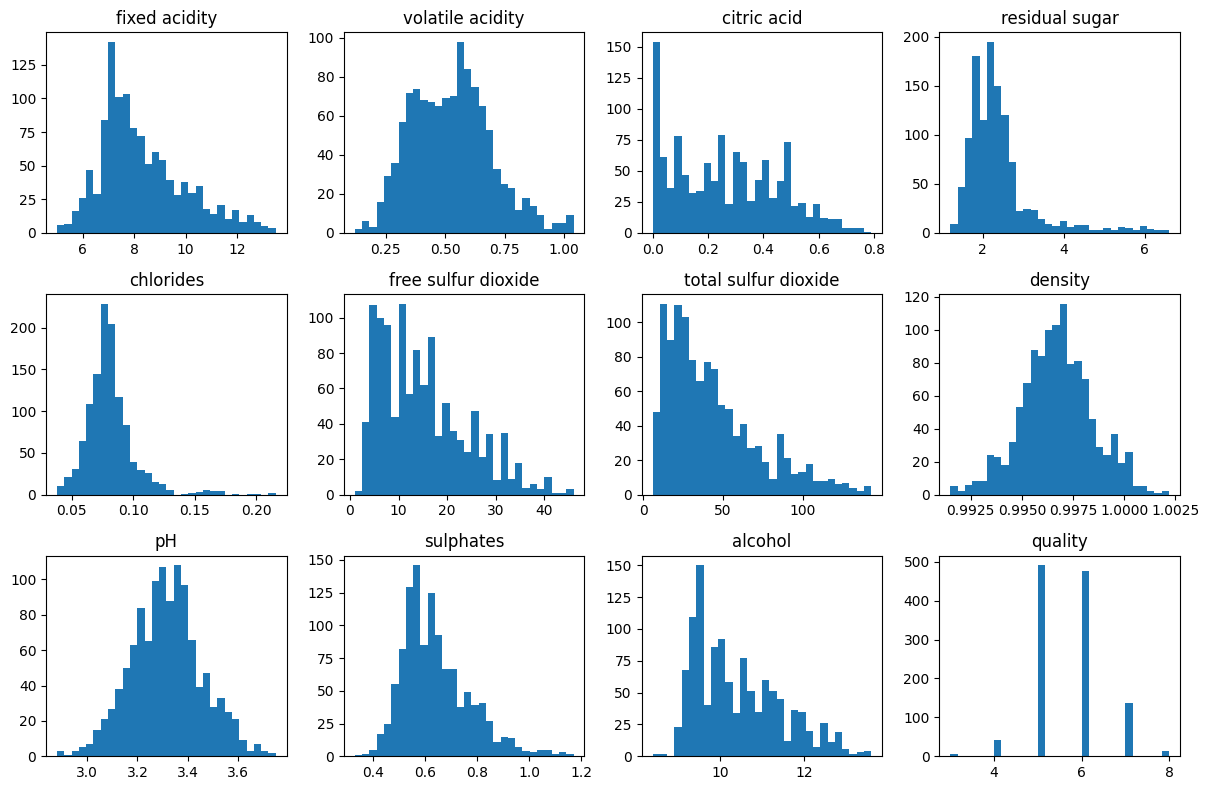

In [54]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches(12,8)
for i, col in enumerate(df_train.columns):
  axes[int(i/4)][i%4].hist(df_train1[col], 30)
  axes[int(i/4)][i%4].set_title(col)
fig.tight_layout()

### 對特定欄位取 log

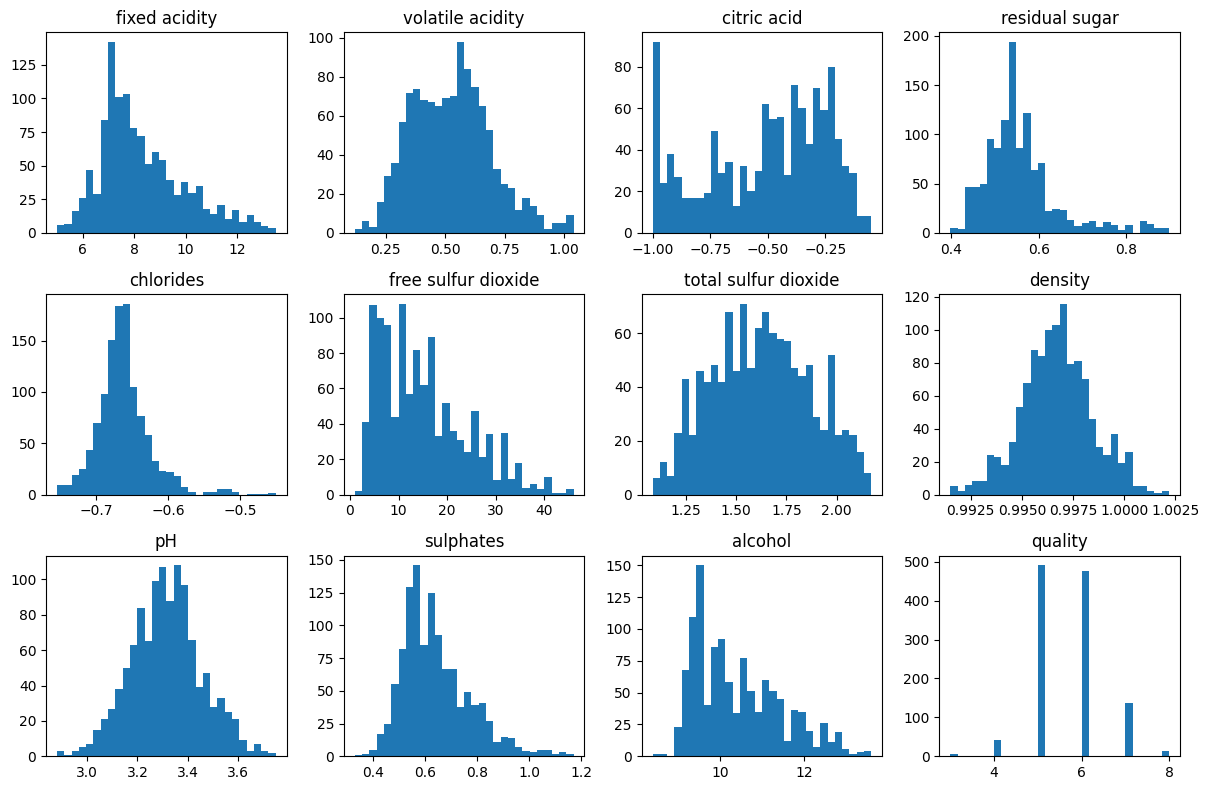

In [55]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches(12,8)
log_columns = ['residual sugar', 'chlorides', 'total sulfur dioxide', 'citric acid']
for i, col in enumerate(df_train1.columns):
  if col in log_columns:
    this_data = np.log(df_train1[col] + np.min(df_train1[col]) + 1e-1) / np.log(10)
  else:
    this_data = df_train1[col]
  axes[int(i/4)][i%4].hist(this_data, 30)
  axes[int(i/4)][i%4].set_title(col)
fig.tight_layout()

## 整合所有的前處理

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
def standard_scale(scaler=None):
  def func(X, scaler=scaler):
    if scaler is None:
      scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    return X
  return func

In [58]:
def many_cross_validations(df, functions, n_samples=25):
  df_train_processed = data_preprocess(df_train, functions)

  acc_list = []
  for i in tqdm(range(n_samples)):
    df_train_processed = df_train_processed.sample(frac=1).reset_index(drop=True)

    X = df_train_processed.drop('quality', axis = 1)
    y = df_train_processed['quality']
    rfc = RandomForestClassifier(n_estimators=200)
    rfc_eval = cross_val_score(estimator = rfc, X = X, y = y, cv = 5)
    acc_list.append(np.mean(rfc_eval))
  print(f'Mean Acc: {np.mean(acc_list):.4f}+-{np.std(acc_list)/np.sqrt(n_samples):.4f}')
  return np.mean(acc_list)

In [59]:
class Preprocess_funcs():
  def add_features(self):
    def func(X):
      X['va_rate'] = X['volatile acidity']/(X['volatile acidity']+ X['citric acid'] + X['fixed acidity'])
      X['ca_rate'] = X['citric acid']/(X['volatile acidity']+ X['citric acid'] + X['fixed acidity'])
      X['fs_rate'] = X['free sulfur dioxide']/(X['free sulfur dioxide']+ X['total sulfur dioxide'])
      return X
    return func

  def drop_features(self, cols=['residual sugar', 'free sulfur dioxide', 'pH']):
    def func(X, cols=cols):
      cols = list(set(cols).intersection(set(X.columns)))
      X = X.drop(cols, axis=1)
      return X
    return func

  def remove_outliers(self, sigma=3):
    def func(df, sigma=sigma):
      remove_idx = np.zeros(len(df_train))
      for i, col in enumerate(df_train.columns[0:-1]):
        this_x = np.array(df_train[col])
        dev = np.abs((this_x - np.mean(this_x)) / np.std(this_x))
        remove_idx[np.where(dev > sigma)] = 1
      return df.iloc[np.where(remove_idx==0)]
    return func

  def log_transform(self, cols=['residual sugar', 'chlorides', 'total sulfur dioxide', 'citric acid']):
    def func(df, cols=cols):
      cols = list(set(cols).intersection(set(df.columns)))
      for col in cols:
        df[col] = np.log(df[col] + np.min(df[col]) + 1e-1) / np.log(10)
      return df
    return func

  def data_preprocess(self, X, functions):
    X = X * 1
    for F in functions:
      X = F(X)
    return X



In [60]:
class Acc_Of_Preprocess_Combination(Preprocess_funcs):
  def __init__(self, df_test):
    self.preprocess_funcs = {
        'AF': self.add_features(),
        'DF': self.drop_features(),
        'RO': self.remove_outliers(),
        'Log': self.log_transform(),
        }
    self.acc_dict = {'Processes':[], 'Acc_CV':[], 'Acc_Test':[]}
    self.df_test = df_test

  def many_cross_validations(self, df_train, func_keys, n_samples=25):
    functions = [self.preprocess_funcs[k] for k in func_keys]
    df_train_processed = self.data_preprocess(df_train, functions)

    acc_list = []
    for i in tqdm(range(n_samples)):
      df_train_processed = df_train_processed.sample(frac=1).reset_index(drop=True)

      X = df_train_processed.drop('quality', axis = 1)
      y = df_train_processed['quality']
      rfc = RandomForestClassifier(n_estimators=200)
      rfc_eval = cross_val_score(estimator = rfc, X = X, y = y, cv = 5)
      acc_list.append(np.mean(rfc_eval))
    print(f'Mean Acc: {np.mean(acc_list):.4f}+-{np.std(acc_list)/np.sqrt(n_samples):.4f}')
    return np.mean(acc_list)

  def test_acc(self, df_train, df_test, func_keys):
    functions = [self.preprocess_funcs[k] for k in func_keys]
    df_train_processed = self.data_preprocess(df_train, functions)
    if 'RO' in func_keys:
      func_keys.remove('RO')
      functions = [self.preprocess_funcs[k] for k in func_keys]
    df_test_processed = self.data_preprocess(df_test, functions)

    X_train = df_train_processed.drop('quality', axis = 1)
    y_train = df_train_processed['quality']

    X_test = df_test_processed.drop('quality', axis = 1)
    y_test = df_test_processed['quality']

    rfc = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
    y_pred = rfc.predict(X_test)

    acc_count = 0
    for i in range(y_pred.shape[0]):
      if y_pred[i] == np.array(y_test)[i]:
        acc_count += 1
    return acc_count/y_pred.shape[0]

  def many_test_acc(self, df, func_keys, n_sample=50):
    total_acc = []
    for i in tqdm(range(n_sample)):
      df_train, df_test = train_test_split(df, test_size=0.2)
      total_acc.append(self.test_acc(df_train, df_test, func_keys))
    mean_acc = np.mean(total_acc)
    std_acc = np.std(total_acc)
    print(f'Mean Acc: {mean_acc:.4f}+-{std_acc/np.sqrt(n_sample):.4f}')
    return mean_acc


  def run(self, df_train, df_test, func_keys):
    this_str = ''
    for k in func_keys:
      this_str += (k + '+')
    if len(this_str) > 0:
      this_str = this_str[0:-1]

    #acc_test = self.test_acc(df_train, df_test, func_keys)
    acc_test = self.many_test_acc(pd.concat([df_train, df_test], axis=0), func_keys)
    acc_cv = self.many_cross_validations(df_train, func_keys)
    #acc = many_cross_validations(df, [self.preprocess_funcs[k] for k in func_keys])
    self.acc_dict['Processes'].append(this_str)
    self.acc_dict['Acc_CV'].append(acc_cv)
    self.acc_dict['Acc_Test'].append(acc_test)

In [61]:
apc = Acc_Of_Preprocess_Combination(df_test)

func_key_lists = [
    [],
    ['DF'],
    ['RO'],
    ['Log'],
    ['AF'],
    ['AF', 'DF'],
    ['AF', 'RO'],
    ['AF', 'Log'],
    ['AF', 'Log', 'DF']
]

for fks in func_key_lists:
  print(fks)
  apc.run(df_train, df_test, fks)
  print('='*50)


[]


100%|██████████| 50/50 [00:48<00:00,  1.03it/s]


Mean Acc: 0.6937+-0.0036


100%|██████████| 25/25 [01:36<00:00,  3.88s/it]


Mean Acc: 0.6739+-0.0012
['DF']


100%|██████████| 50/50 [00:40<00:00,  1.25it/s]


Mean Acc: 0.6951+-0.0036


100%|██████████| 25/25 [01:23<00:00,  3.34s/it]


Mean Acc: 0.6727+-0.0016
['RO']


100%|██████████| 50/50 [00:45<00:00,  1.11it/s]


Mean Acc: 0.7020+-0.0031


100%|██████████| 25/25 [01:37<00:00,  3.92s/it]


Mean Acc: 0.6770+-0.0015
['Log']


100%|██████████| 50/50 [00:46<00:00,  1.08it/s]


Mean Acc: 0.6801+-0.0033


100%|██████████| 25/25 [01:36<00:00,  3.88s/it]


Mean Acc: 0.6715+-0.0017
['AF']


100%|██████████| 50/50 [00:47<00:00,  1.05it/s]


Mean Acc: 0.7050+-0.0030


100%|██████████| 25/25 [01:39<00:00,  3.97s/it]


Mean Acc: 0.6743+-0.0016
['AF', 'DF']


100%|██████████| 50/50 [00:48<00:00,  1.02it/s]


Mean Acc: 0.6984+-0.0029


100%|██████████| 25/25 [01:39<00:00,  3.98s/it]


Mean Acc: 0.6762+-0.0016
['AF', 'RO']


100%|██████████| 50/50 [00:45<00:00,  1.10it/s]


Mean Acc: 0.6998+-0.0036


100%|██████████| 25/25 [01:38<00:00,  3.96s/it]


Mean Acc: 0.6783+-0.0019
['AF', 'Log']


100%|██████████| 50/50 [00:46<00:00,  1.07it/s]


Mean Acc: 0.6861+-0.0036


100%|██████████| 25/25 [01:37<00:00,  3.92s/it]


Mean Acc: 0.6784+-0.0015
['AF', 'Log', 'DF']


100%|██████████| 50/50 [00:47<00:00,  1.05it/s]


Mean Acc: 0.6898+-0.0031


100%|██████████| 25/25 [01:38<00:00,  3.93s/it]

Mean Acc: 0.6756+-0.0017


DF: Drop Features <br>
RO: Remove Outliers <br>
Log: Transform Data With Log <br>
AF: Add Features <br>

In [62]:
pd.DataFrame(apc.acc_dict)

,Processes,Acc_CV,Acc_Test
0,,0.673937,0.693750
1,DF,0.672683,0.695125
2,RO,0.677032,0.702000
3,Log,0.671528,0.680125
4,AF,0.674252,0.705000
5,AF+DF,0.676191,0.698438
6,AF+RO,0.678317,0.699750
7,AF+Log,0.678385,0.686063
8,AF+Log+DF,0.675587,0.689812
